# Learning Unit 4 - Bias

## Reading Part - Prepare for exercise

**✏️ Task 4.1**

1. *Download "A Survey on Bias and Fairness in Machine Learning" https://dl.acm.org/doi/10.1145/3457607. (You can download it per Eduroam or VPN if your are working from home.)*
2. *You do NOT have to read it, but you need to have the paper for the exercise.*

---

## Programming Part - Get to know datasets

In this learning unit, we will explore the diabetes dataset you already worked with in previous learning units.

The dataset is called *“CDC Diabetes Health Indicators”*. You can find more information about it in the UCI ML Library [here](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators). In the Resources section, we have also provided a file called `diabetes_012_health_indicators_BRFSS2015.csv`, which is one of three csv files in the dataset.

In this learning unit, we will continue our analysis of the *CDC Diabetes Health Indicators* dataset. We will investigate the possible biases of this dataset, and we will train a diabetes prediction model.

First, let's take loot another at the attributes of our dataset. In the last learning unit, we examined the distributions of the attributes and their meanings. This time, we want to take a closer look at the potential problems that can arise from including certain features.

**✏️ Task 4.2** 
*Perform an exploratory data analysis on the dataset. Think about all the things that you would need to know about this data in order to make confident statements about it and to be able to continue to work with it. Make sure to at least:*
- *look at the features and try to understand them,*
- *look at the distributions of the following features: sex, age education, income, diabetes_012, HighBP, HighChol*

*Write down your code in the Python cell, and your key findings about the sample in the Markdown cell below.*

If you are feeling lost about the exploratory data analysis, take a look at the linked article in the resources section below.

Rows & Columns: (253680, 22)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


'FEATURES/VARIABLES:'

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


UNIQUE VALUES of each VARIABLE:
Diabetes_012 (3): [0. 1. 2.]
HighBP (2): [0. 1.]
HighChol (2): [0. 1.]
CholCheck (2): [0. 1.]
BMI (84): [12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29.
 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47.
 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65.
 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83.
 84. 85. 86. 87. 88. 89. 90. 91. 92. 95. 96. 98.]
Smoker (2): [0. 1.]
Stroke (2): [0. 1.]
HeartDiseaseorAttack (2): [0. 1.]
PhysActivity (2): [0. 1.]
Fruits (2): [0. 1.]
Veggies (2): [0. 1.]
HvyAlcoholConsump (2): [0. 1.]
AnyHealthcare (2): [0. 1.]
NoDocbcCost (2): [0. 1.]
GenHlth (5): [1. 2. 3. 4. 5.]
MentHlth (31): [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
PhysHlth (31): [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 2

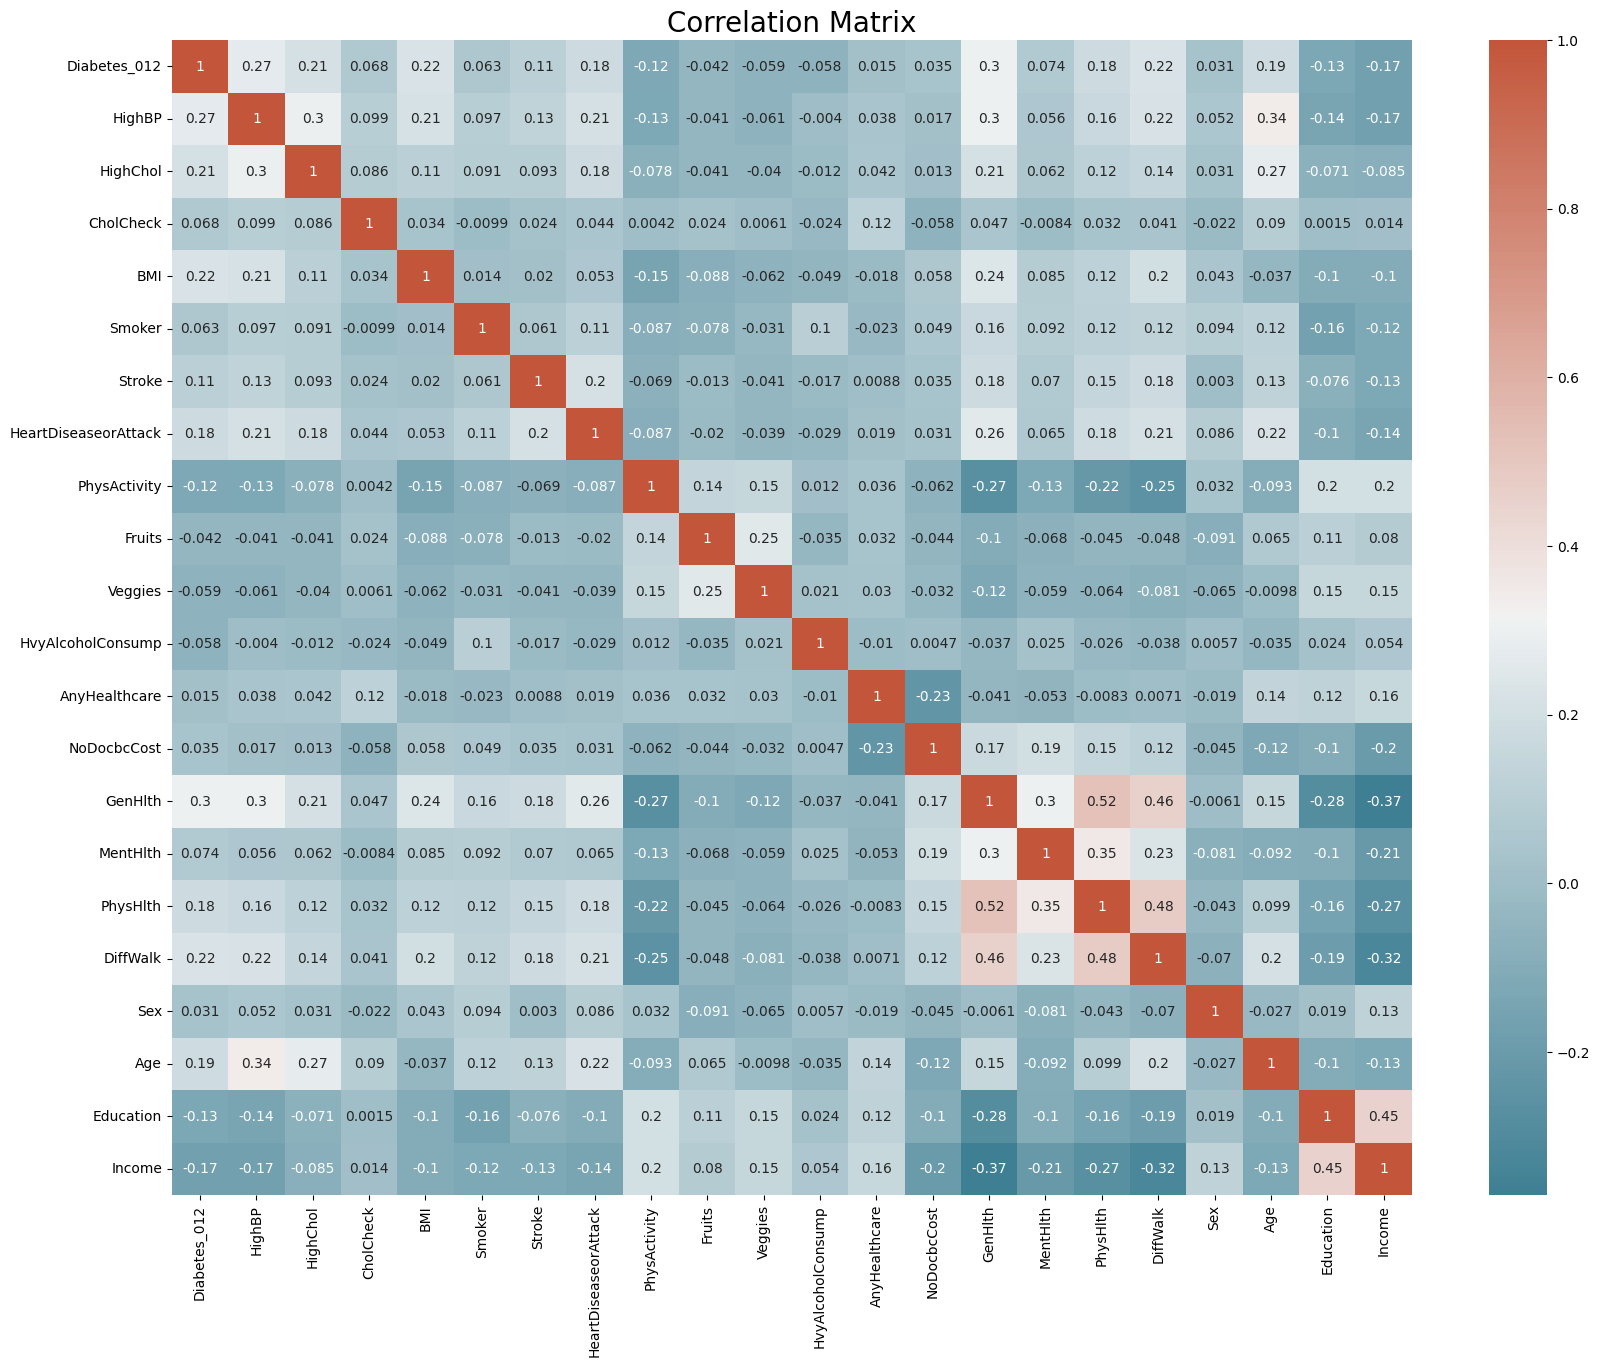

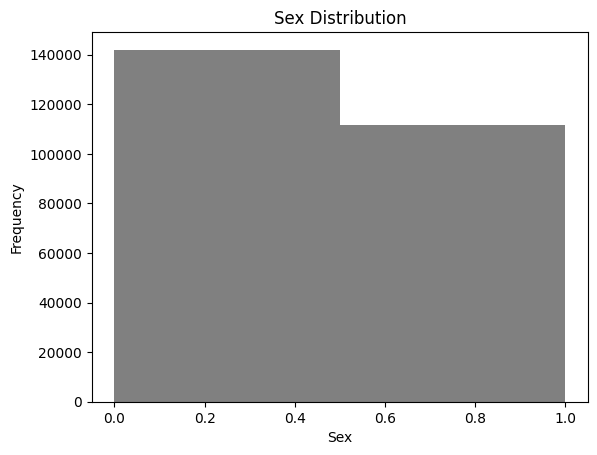

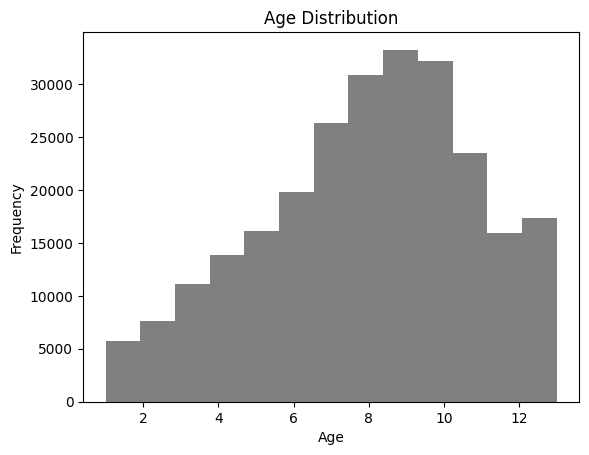

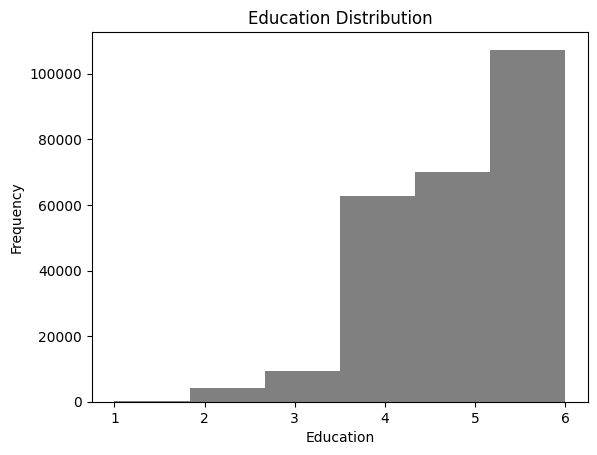

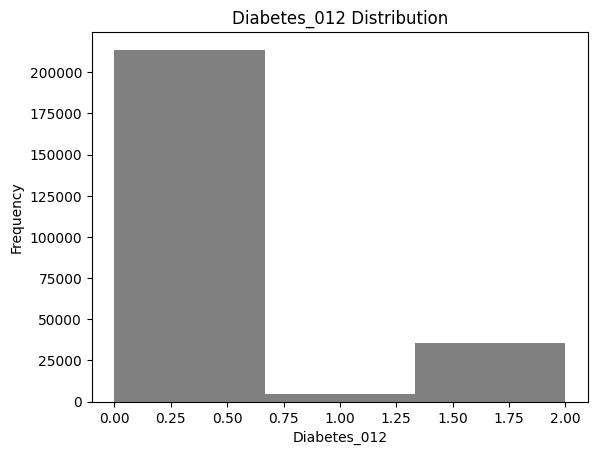

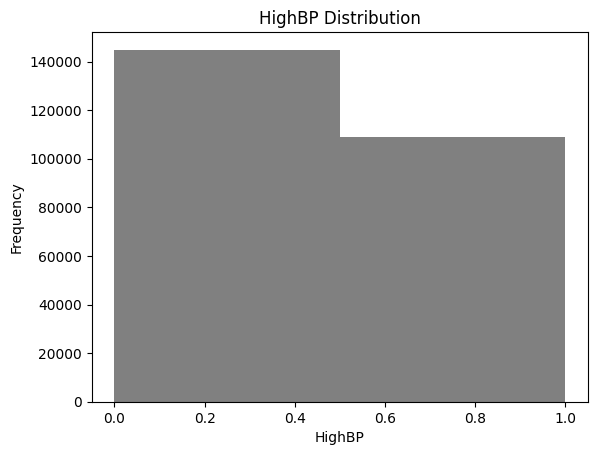

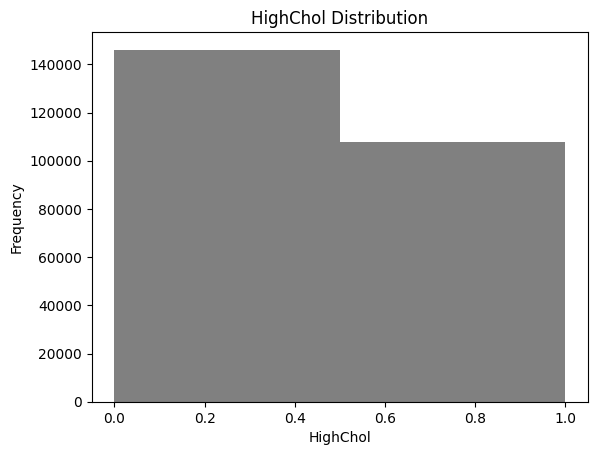

In [2]:
import  numpy as np
import  pandas as pd
import  matplotlib.pylab as plt
import  seaborn as sns
from IPython.display import display

df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
print("Rows & Columns:", df.shape)
display(df.head())
display("FEATURES/VARIABLES:", df.columns)
# df.nunique(axis=0)
display(df.describe())

df.Diabetes_012.unique()
print("UNIQUE VALUES of each VARIABLE:")
for col in df.columns:
    unique = np.sort(df[col].unique())
    print(f"{col} ({len(unique)}): {unique}")

corr = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title("Correlation Matrix", fontsize=20)
plt.show()

def plot_histogram(df, column, bins, color='gray'):
    if column not in df.columns:
        print(f"Column '{column}' not found.")
        return
    df[column].plot(kind='hist', bins=bins, color=color)
    plt.xlabel(column)
    plt.title(f'{column} Distribution')
    plt.show()
#####

# sns.pairplot(df)
plot_histogram(df, "Sex", 2)
plot_histogram(df, "Age", 13)
plot_histogram(df, "Education", 6)
plot_histogram(df, "Diabetes_012", 3)
plot_histogram(df, "HighBP", 2)
plot_histogram(df, "HighChol", 2)


---

In the lecture, you learned about *"protected attributes"*. Protected attributes refer to sensitive or personal characteristics that are legally or ethically protected from being used as a basis for discrimination in data science applications. The *CDC Diabetes Health Indicators* dataset contains some of these attributes. It is important to understand and be able to identify the difference between protected and unprotected attributes.

**✏️ Task 4.3**
1. *What are the protected attributes of the dataset?*
2. *Explain why it makes sense to protect these attributes. Identify any problems that may arise from including them.*
3. *Is using the unprotected attributes unproblematic?*

*Please write your answers in the markdown cell below.*

1. **Sex, Age, Education and Income are protected. They are represented in integer values instead of real ones.**
2. **Sex and especially Age info can lead to negative bias/discrimination by the health insurance etc. Income and education can likely correlate with socioeconomic status of individuals. In case of a bias presence in the prediction model, will likely systematically augment the existing bias towards certain groups.**
3. **Unprotected attributes (e.g. BMI, alcohol, fruits/veggies consumptions) too can lead to bias indirectly in a similar way with the protected ones.**

---

We continue to train a first version of a diabetes type prediction system. You will compare this system to the one you create in the next assignment to evaluate the impact of bias mitigation and fairness techniques. 

This task is intended to be open-ended. You are expected to use your prior data science knowledge. Think about the type of problem you are trying to solve and what model might be a good fit. If you are not sure what to do, take a look at Assignment 1 for a model training example and consider looking at other resources.

**✏️ Task 4.4** 
1. *Train a model that predicts the type of diabetes (the “diabetes_012” feature).*
2. *Try at least one other type of model and compare the results with the model from step 1 (e.g., RandomForestClassifier, KNeighborsClassifier, LogisticRegression).*
3. *Choose the best performing model and further optimize it. Try to avoid [common pitfalls](https://www.gyata.ai/machine-learning/machine-learning-optimization/) of machine learning optimization.* <br>
Hint: Save the model and your predictions, you will need them in the next learning unit again!

*Please write your answers in the markdown cell below.*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Split the dataframe into features (X) and target variable (y)
X = df.drop("Diabetes_012", axis=1)
y = df["Diabetes_012"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an instance of LogisticRegression
logreg = LogisticRegression(max_iter=1000)

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = logreg.predict(X_test)
y_pred

# Get the predicted labels
y_pred = logreg.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate the precision
precision = precision_score(y_test, y_pred, average='weighted', zero_division=False)

# Calculate the recall
recall = recall_score(y_test, y_pred, average='weighted', zero_division=False)

# Print the scores
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

###
###
### for EXCLUDING Protected Attributes


Accuracy: 0.8482537054556922
Precision: 0.8023966157538416
Recall: 0.8482537054556922


TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 4 were given

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

tree_model = DecisionTreeClassifier(random_state=42)

tree_model.fit(X_train, y_train)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.7678768527278461
Precision: 0.7815262082380063
Recall: 0.7678768527278461


---

## 📝 Feedback
We are interested in your feedback in order to improve this course. We will read all of your feedback and evaluate it. What you share may have a direct impact on the rest of the course or future iterations of it.

Write down your feedback on the lecture, the exercises, or the assignments in the Markdown cell below. Furthermore, please note the approximate time it took you to complete the assignment. You may also write about your insights, what you found interesting, or questions that you have.